In [1]:
import pandas as pd
import numpy as np
import string
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from utilidades.graficar import ver_dispersion
import lightgbm as lgb
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

In [2]:
def to_ascii(s):
    car_ascii = set(string.printable)
    return "".join([a for a in s if a in car_ascii])

In [3]:
ruta_data = "../data"
ruta_train = ruta_data + "/train.csv"
ruta_test = ruta_data + "/test.csv"

In [4]:
df_metros_train = pd.read_csv(f"{ruta_data}/train.csv", usecols=["metroscubiertos", "metrostotales"])
df_metros_test = pd.read_csv(f"{ruta_data}/test.csv", usecols=["metroscubiertos", "metrostotales"])

In [5]:
train_lim = pd.read_csv(f"{ruta_data}/train_limpio.csv")
test_lim = pd.read_csv(f"{ruta_data}/test_limpio.csv")

In [6]:
train_lim = train_lim.drop(["metroscubiertos", "metrostotales"], axis=1)
test_lim = test_lim.drop(["metroscubiertos", "metrostotales"], axis=1)

In [7]:
train_lim["metroscubiertos"] = df_metros_train["metroscubiertos"]
test_lim["metroscubiertos"] = df_metros_test["metroscubiertos"]
train_lim["metrostotales"] = df_metros_train["metrostotales"]
test_lim["metrostotales"] = df_metros_test["metrostotales"]

In [8]:
train_lim = train_lim.rename(columns={col: to_ascii(col) for col in train_lim.columns})
test_lim = test_lim.rename(columns={col: to_ascii(col) for col in test_lim.columns})

In [9]:
pobl = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_train.csv")
pobl_test = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_test.csv")

In [10]:
train_lim["poblacion"] = pobl
test_lim["poblacion"] = pobl_test

In [11]:
test = pd.concat([train_lim[train_lim["metrostotales"].isna()], test_lim[test_lim["metrostotales"].isna()]], sort=True)

In [12]:
train = pd.concat([train_lim[train_lim["metrostotales"].notnull()], test_lim[test_lim["metrostotales"].notnull()]], sort=True)

In [13]:
X, y = train.drop(["precio", "metroscubiertos", "metrostotales", "dia", "mes", "anio", "centroscomercialescercanos", "escuelascercanas", "piscina", "usosmultiples"], axis=1),train["metrostotales"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7789)

In [15]:
y_train_l = np.log(y_train)
d_train = lgb.Dataset(X_train, label= y_train_l)
param = {
'num_leaves': 200,
"learning_rate": 0.009,
"num_iterations": 4000,
"feature_fraction":0.5,
"min_data_in_leaf":30
}
reg = lgb.train(param, d_train)
pred = reg.predict(X_test)
pred = np.exp(pred)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [16]:
mean_absolute_error(y_test, pred)

48.27365468269077

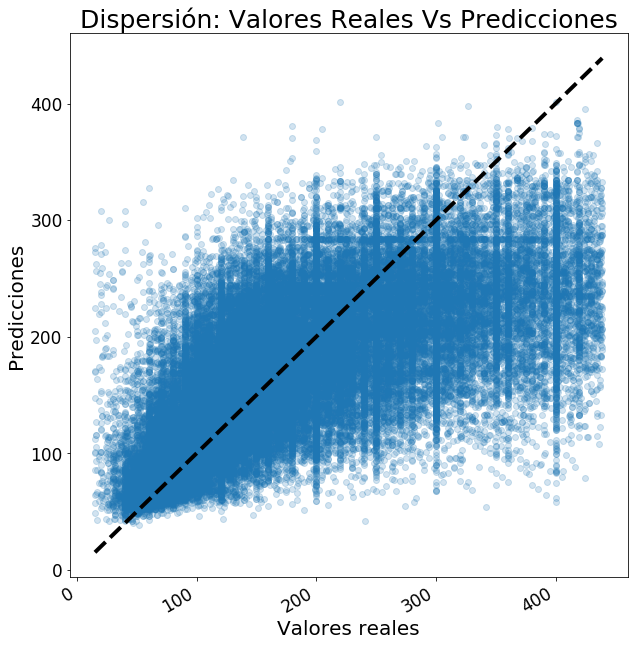

In [17]:
ver_dispersion(y_test, pred)

In [18]:
a_predecir_train = test.iloc[:train_lim["metrostotales"].isna().sum()]

In [19]:
a_predecir_test = test.iloc[train_lim["metrostotales"].isna().sum():]

In [20]:
pred_train = reg.predict(a_predecir_train)
pred_train = np.exp(pred_train)

In [21]:
pred_test = reg.predict(a_predecir_test)
pred_test = np.exp(pred_test)

In [22]:
train_lim.loc[a_predecir_train.index, "metrostotales"] = pred_train

In [23]:
train_lim[["metrostotales"]].to_csv(f"{ruta_data}/features/metros_totales_train_lgbm.csv", index=False)

In [24]:
test_lim.loc[a_predecir_test.index, "metrostotales"] = pred_test

In [25]:
test_lim[["metrostotales"]].to_csv(f"{ruta_data}/features/metros_totales_test_lgbm.csv", index=False)

---

In [26]:
test = pd.concat([train_lim[train_lim["metroscubiertos"].isna()], test_lim[test_lim["metroscubiertos"].isna()]], sort=True)

In [27]:
train = pd.concat([train_lim[train_lim["metroscubiertos"].notnull()], test_lim[test_lim["metroscubiertos"].notnull()]], sort=True)

In [28]:
X, y = train.drop(["precio", "metroscubiertos", "metrostotales", "dia", "mes", "anio", "centroscomercialescercanos", "escuelascercanas", "piscina", "usosmultiples"], axis=1),train["metroscubiertos"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7789)

In [30]:
y_train_l = np.log(y_train)
d_train = lgb.Dataset(X_train, label= y_train_l)
param = {
'num_leaves': 200,
"learning_rate": 0.004,
"num_iterations": 5000,
"feature_fraction":0.5,
"min_data_in_leaf":50
}
reg = lgb.train(param, d_train)
pred = reg.predict(X_test)
pred = np.exp(pred)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [31]:
mean_absolute_error(y_test, pred)

43.282074175739496

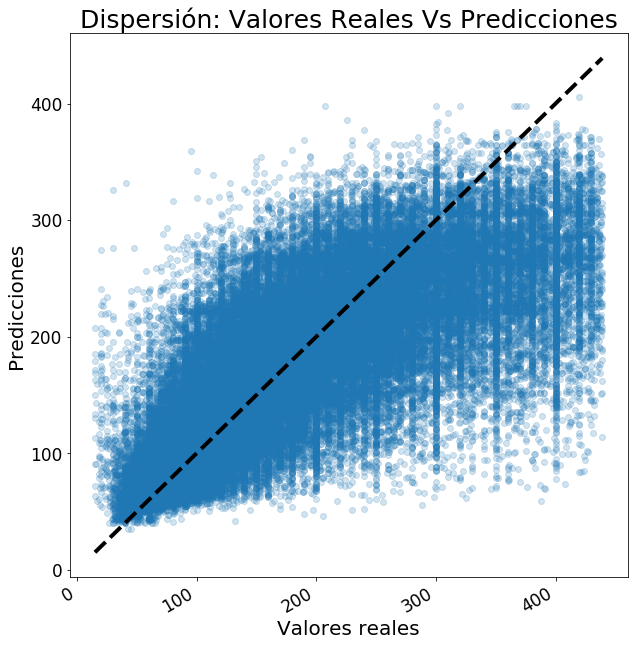

In [32]:
ver_dispersion(y_test, pred)

In [33]:
a_predecir_train = test.iloc[:train_lim["metroscubiertos"].isna().sum()]
a_predecir_test = test.iloc[train_lim["metroscubiertos"].isna().sum():]

In [34]:
pred_train = reg.predict(a_predecir_train)
pred_train = np.exp(pred_train)

In [35]:
pred_test = reg.predict(a_predecir_test)
pred_test = np.exp(pred_test)

In [36]:
train_lim.loc[a_predecir_train.index, "metroscubiertos"] = pred_train
test_lim.loc[a_predecir_test.index, "metroscubiertos"] = pred_test

In [37]:
train_lim[["metroscubiertos"]].to_csv(f"{ruta_data}/features/metros_cubiertos_train_lgbm.csv", index=False)
test_lim[["metroscubiertos"]].to_csv(f"{ruta_data}/features/metros_cubiertos_test_lgbm.csv", index=False)